Intermediate Level Task-1

Exploratory Data Analysis on Dataset - Terrorism
As a security/defense analyst, try to find out the hot zone of terrorism.

Watch Tutorial from here https://youtu.be/CBCfOTePVPo

Dataset: https://bit.ly/2TK5Xn5

Name: Pranjali Devendra Desai

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# os.chdir('C:\Lets grow more')
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3.0,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3.0,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah

In [7]:
data.tail(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
74721,200210300003,2002,10,30,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,Gauteng,Soweto,-26.252697,27.870275,1.0,1,A bridge at New Canada railway station in Suweto,10/30/2002: Three bombs exploded at a bridge l...,1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19.0,Transportation,103.0,Bridge/Car Tunnel,Railway station,A bridge at the New Canada railway station in ...,...,NaN,NaN,"""commercial explosives"" commonly used by the m...",1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),66666.6666,A bridge at the railway station was bombed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Soweto blast linked to extremists seeking to ...","""Explosions Rock Soweto, Bronkhorspruit,"" All ...","""South African police follow up clues on Sowet...",UMD Schmid 2012,-9.0,-9.0,0.0,-9.0,"200210300003, 200210290003, 200210300002, 2002..."
74722,200210300004,2002,10,30,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,Gauteng,Soweto,-26.252697,27.870275,1.0,1,Along the rail line approximately 400 meters f...,10/30/2002: Two bombs exploded approximately 4...,1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19.0,Transportation,100.0,Train/Train Tracks/Trolley,Railway station,Rail line near New Canada railway station in S...,...,NaN,NaN,"""commercial explosives"" commonly used by the m...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),66666.6666,The rail line near the railway station was bombed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Soweto blast linked to extremists seeking to ...","""Explosions Rock Soweto, Bronkhorspruit,"" All ...","""South African police follow up clues on Sowet...",UMD Schmid 2012,-9.0,-9.0,0.0,-9.0,"200210300004, 200210290003, 200210300002, 2002..."
74723,200210300005,2002,10,30,NaN,0,NaN,183,South Africa,11,Sub-Saharan Africa,Gauteng,Soweto,-26.252697,27.870275,1.0,1,NaN,10/30/2002: A bomb exploded at the Midway rail...,1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19.0,Transportation,100.0,Train/Train Tracks/Trolley,Railway station,Midway railway station in Suweto,...,NaN,NaN,"""commercial explosives"" commonly used by the m...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),66666.6666,The railway station was bombed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Soweto blast linked to extremists seeking to ...","""Explosions Rock Soweto, Bronkhorspruit,"" All ...","""South African police follow up clues on Sowet...",UMD Schmid 2012,-9.0,-9.0,0.0,-9.0,"200210300005, 200210290003, 200210300002, 2002..."
74724,200211010001,2002,11,1,NaN,0,NaN,167,Russia,9,Eastern Europe,Chechnya (Republic),Grozny,43.320229,45.654491,1.0,0,NaN,11/01/2002: A police motor vehicle hit a land ...,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3.0,Police,23.0,Police Patrol (including vehicles and convoys),Russian Police,Russian police vehicle traveling in Groznyy,...,NaN,NaN,A land mine was used in the incident.,0.0,0.0,0.0,3.0,0.0,0.0,-9.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Five policemen wounded by bomb blasts in Chec...,NaN,NaN,CETIS,-9.0,-9.0,

In [8]:
data.shape

(74731, 135)

In [9]:
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [10]:
data.size

10088685

In [11]:
data.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    74561
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       66370
Length: 135, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74731 entries, 0 to 74730
Columns: 135 entries, eventid to related
dtypes: float64(61), int64(16), object(58)
memory usage: 77.0+ MB


In [13]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,7.473100e+04,74731.000000,74731.000000,74731.000000,74731.000000,74731.000000,74731.000000,70927.000000,7.092600e+04,74730.000000,74731.000000,74731.000000,74731.000000,74731.000000,74731.000000,11867.000000,74731.000000,74731.000000,74731.000000,74731.000000,663.000000,39.000000,74730.000000,71133.000000,74276.000000,1630.000000,1381.000000,1521.000000,264.000000,219.000000,257.000000,74622.000000,272.000000,25.00000,74730.000000,12112.000000,7448.000000,8610.000000,1361.00000,152.000000,67.000000,21.000000,19.000000,1335.000000,74730.000000,62528.000000,4165.000000,3526.000000,530.000000,462.000000,69.000000,65.000000,68494.000000,10609.000000,10138.000000,66053.000000,10532.000000,9589.000000,74730.000000,20961.000000,1.021800e+04,74554.000000,4901.000000,4890.000000,1676.000000,1752.000000,68004.000000,7.960000e+02,9.800000e+01,2.800000e+02,101.000000,2332.000000,1928.000000,74730.000000,74730.000000,74730.000000,74730.000000
mean,1.988207e+11,1988.141133,6.466834,15.353321,0.024769,146.318810,5.860232,18.999599,-1.224097e+03,1.435300,0.046915,0.986712,0.989777,0.881348,-1.501331,1.277324,0.111895,0.914493,0.004162,3.108108,3.806938,5.282051,7.986177,45.792586,128.078666,9.339264,50.611151,150.924392,9.128788,54.584475,132.077821,0.063172,0.268382,0.24000,0.002395,37.633174,-13.920247,-0.234611,5.89493,0.138158,6.656716,0.904762,7.421053,-7.289139,6.520045,10.201702,6.590876,10.457742,6.750943,11.125541,6.318841,11.015385,2.290828,0.404468,0.402742,2.579928,0.279814,0.040880,0.574160,3.368065,7.449986e+05,0.062237,3.506835,-0.306135,0.147971,-0.889269,-0.002323,3.358273e+06,3.855830e+04,7.505175e+05,1126.514851,3.772727,-8.580394,-3.773786,-3.730724,0.125264,-2.987020
std,7.319667e+08,7.319151,3.388993,8.819473,0.155421,136.453938,3.198348,23.960769,3.236186e+05,1.102088,0.233129,0.114504,0.100593,0.323381,3.584018,0.575522,0.315239,0.279636,0.064376,1.981298,2.143383,1.972825,6.788927,32.843411,82.862386,6.406497,29.257901,144.037213,6.159978,29.450097,106.689247,0.243273,0.443934,0.43589,0.048883,625.677936,35.260553,1.905421,3.55006,1.760679,3.863396,0.300793,3.610414,3.578043,2.303593,7.057992,1.912775,7.467893,2.120707,8.009853,1.519411,8.076765,12.532399,18.870114,4.142078,53.827737,9.909487,0.657898,1.274161,0.531695,3.027726e+07,0.305570,313.917909,7.689100,102.765428,117.141820,0.366045,3.691355e+07,3.057575e+05,3.557089e+06,6685.337098,1.939181,57.427789,4.504323,4.560533,0.789068,4.523794
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.00000,0.000000,-99.000000,-99.000000,-9.000000,1.00000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.983051e+11,1983.000000,4.000000,8.000000,0.0000

In [14]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

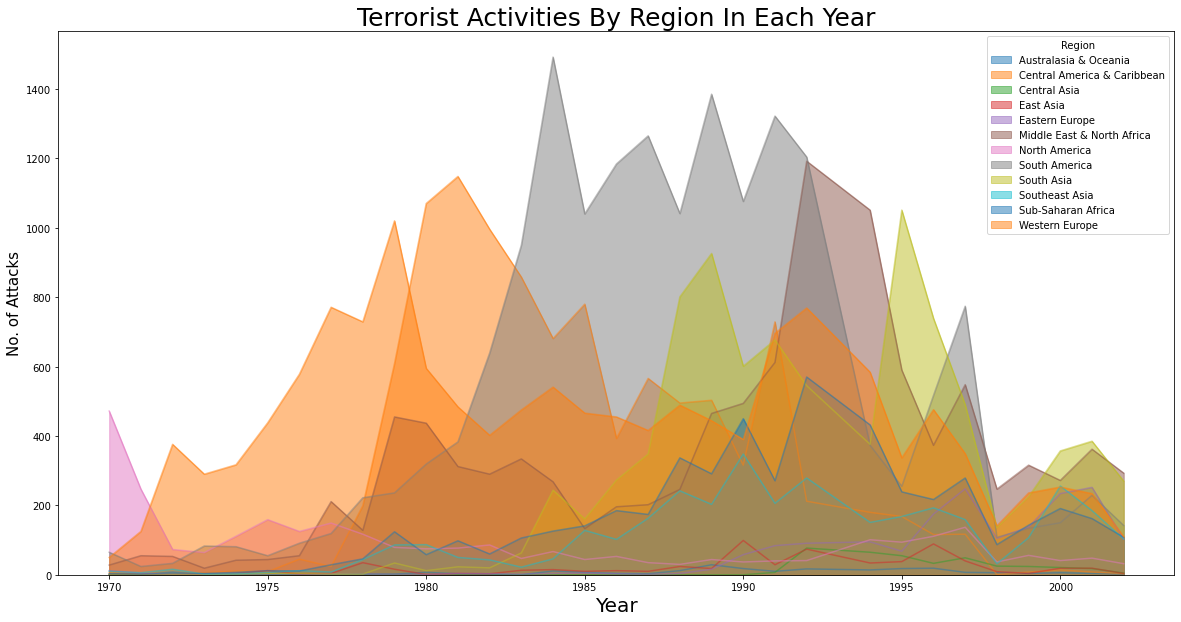

In [28]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('No. of Attacks',fontsize=15)
plt.xlabel("Year",fontsize=20)
plt.show()

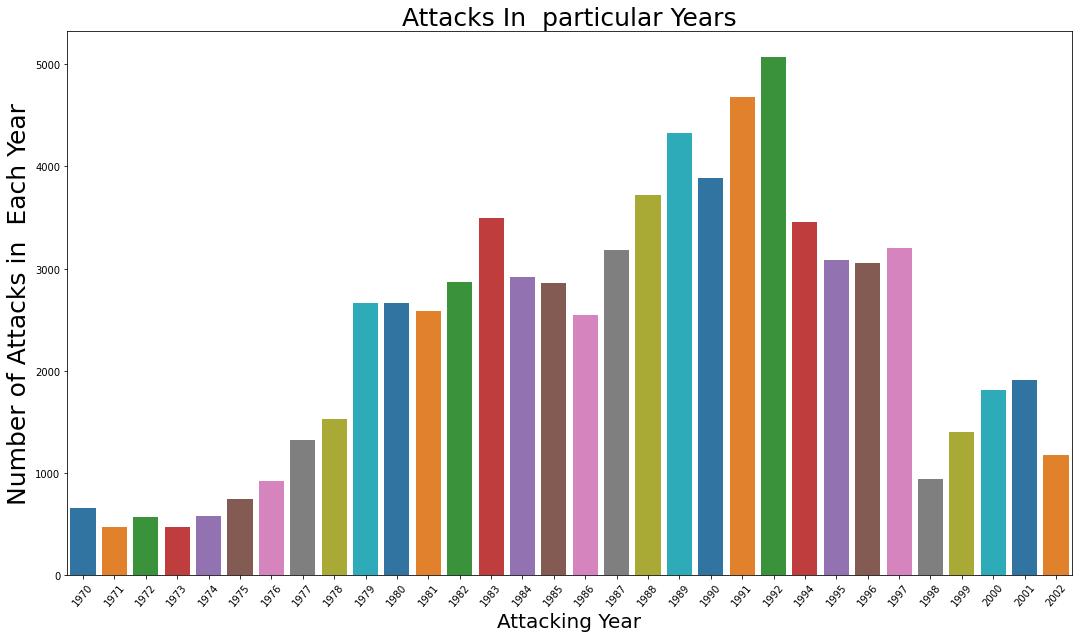

In [29]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks in  Each Year',fontsize=25)
plt.title('Attacks In  particular Years',fontsize=25)
plt.show()

In [31]:
#top 12 countries with most number of attacks
attack = data.Country.value_counts()[:12]
attack

Colombia          6682
Peru              6031
El Salvador       5320
United Kingdom    4349
India             3605
Spain             3057
Turkey            2548
United States     2466
France            2330
Chile             2276
Sri Lanka         2270
Philippines       2214
Name: Country, dtype: int64

In [32]:
#top 15 terrorist groups with most number of attacks
data.Group.value_counts()[1:16]

Shining Path (SL)                                   4507
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2663
Basque Fatherland and Freedom (ETA)                 1897
Revolutionary Armed Forces of Colombia (FARC)       1462
National Liberation Army of Colombia (ELN)          1246
Palestinians                                        1125
Liberation Tigers of Tamil Eelam (LTTE)             1106
Kurdistan Workers' Party (PKK)                      1077
New People's Army (NPA)                             1017
Nicaraguan Democratic Force (FDN)                    895
Manuel Rodriguez Patriotic Front (FPMR)              830
Sikh Extremists                                      715
African National Congress (South Africa)             607
Tupac Amaru Revolutionary Movement (MRTA)            557
Name: Group, dtype: int64

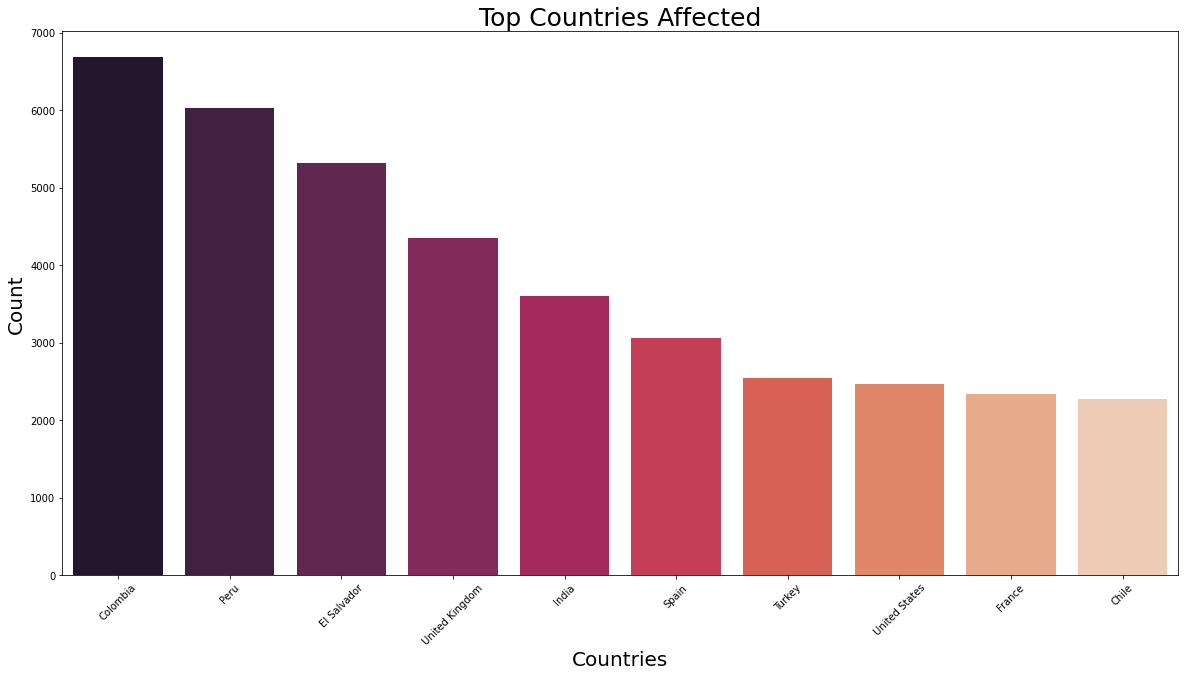

In [33]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='rocket')
plt.title('Top Countries Affected', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation = 45)
plt.show()

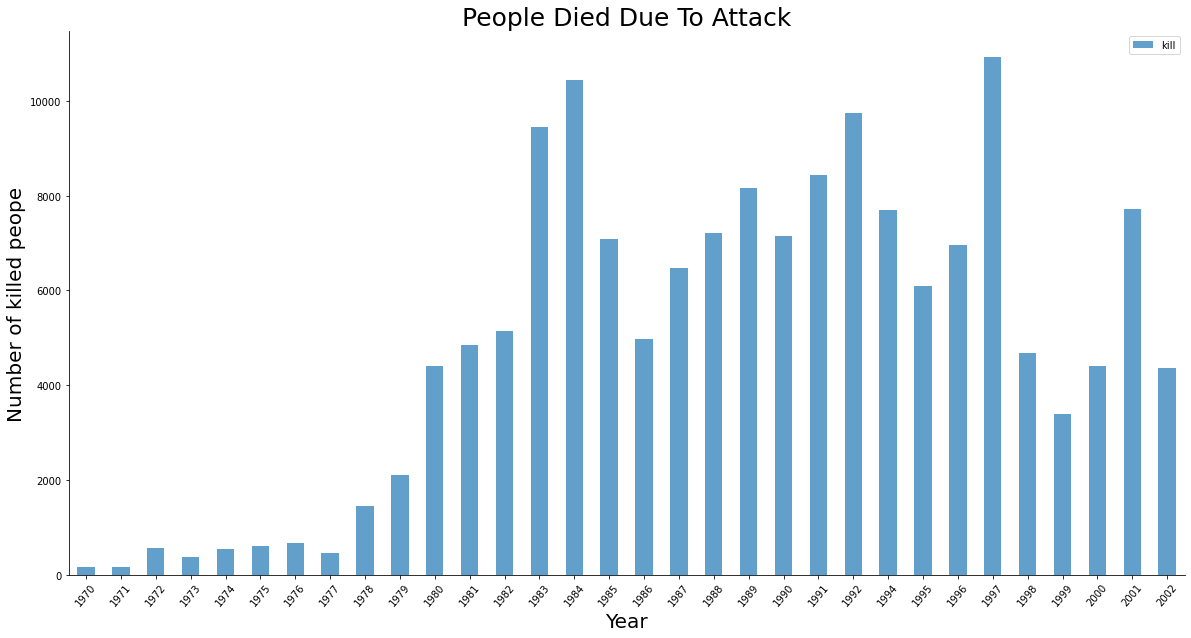

In [20]:
data1 = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data1.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

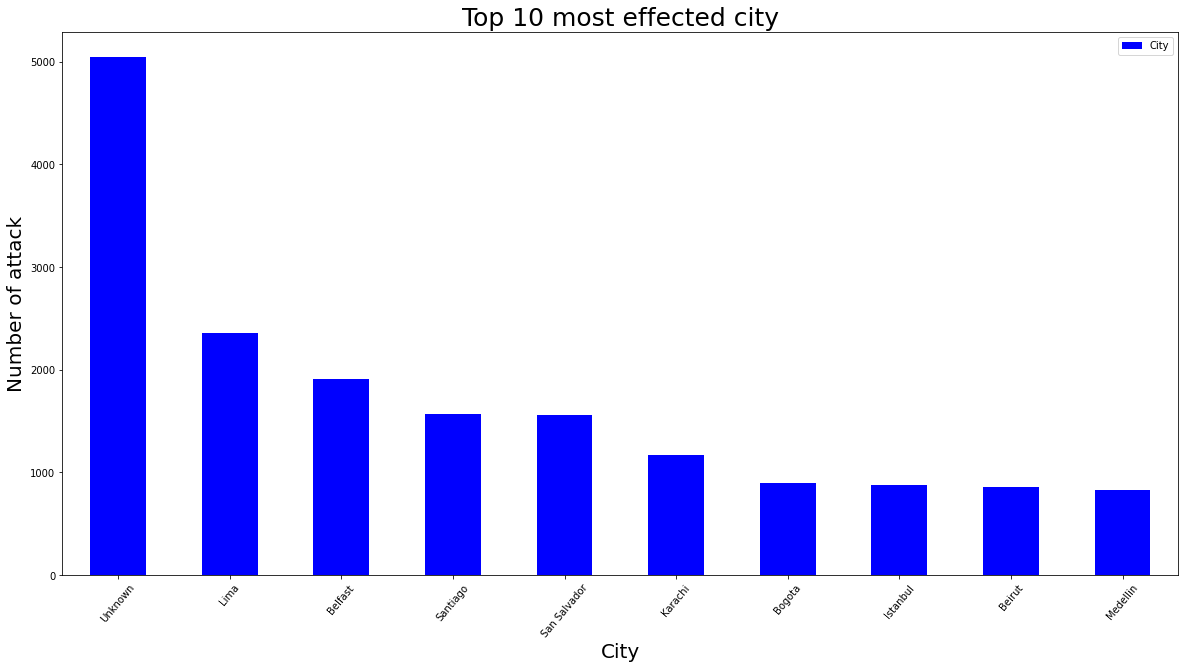

In [34]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 10 most effected city",fontsize=25)
plt.show()

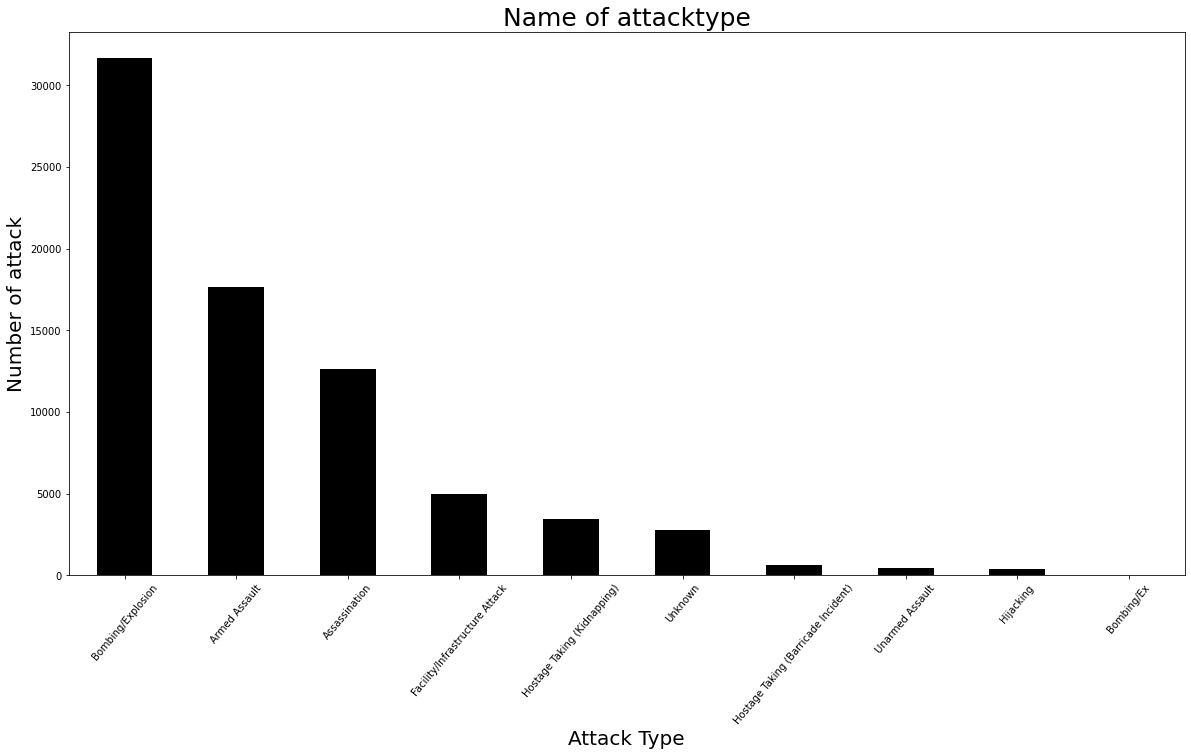

In [35]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='black')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Name of attacktype",fontsize=25)
plt.show()

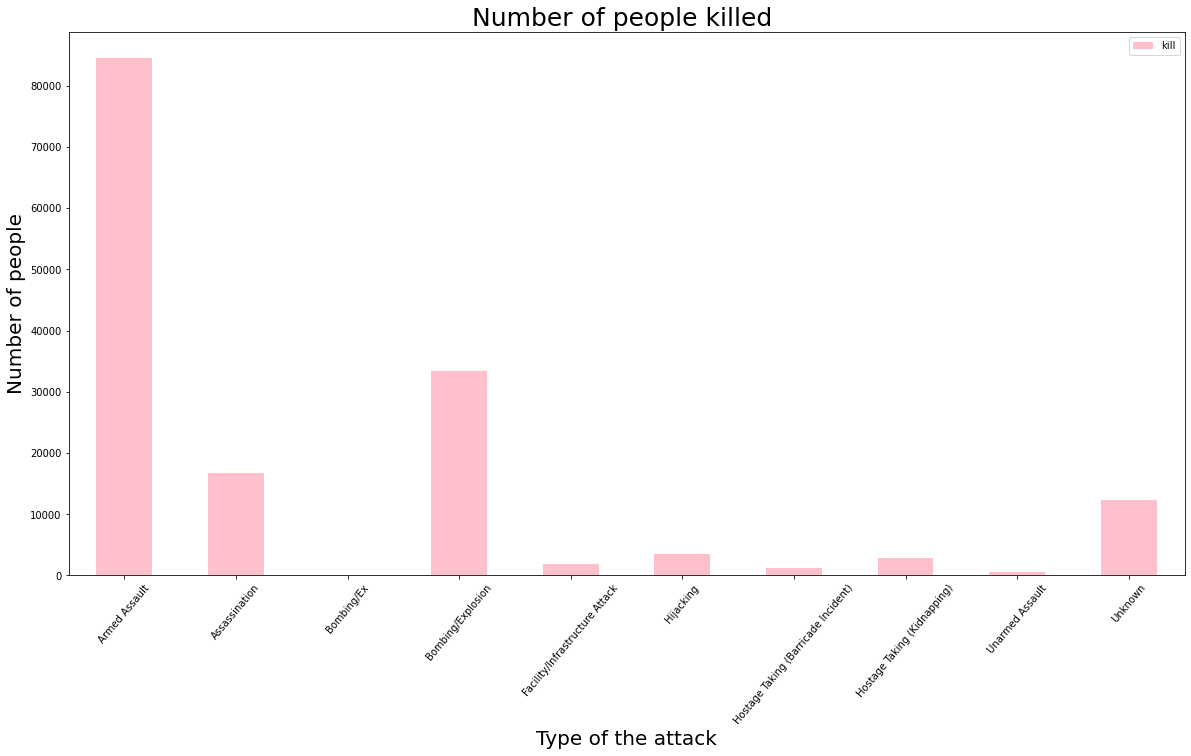

In [37]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['pink'])
plt.xticks(rotation=50)
plt.title("Number of people killed ",fontsize=25)
plt.ylabel('Number of people',fontsize=20)
plt.xlabel('Type of the attack',fontsize=20)
plt.show()

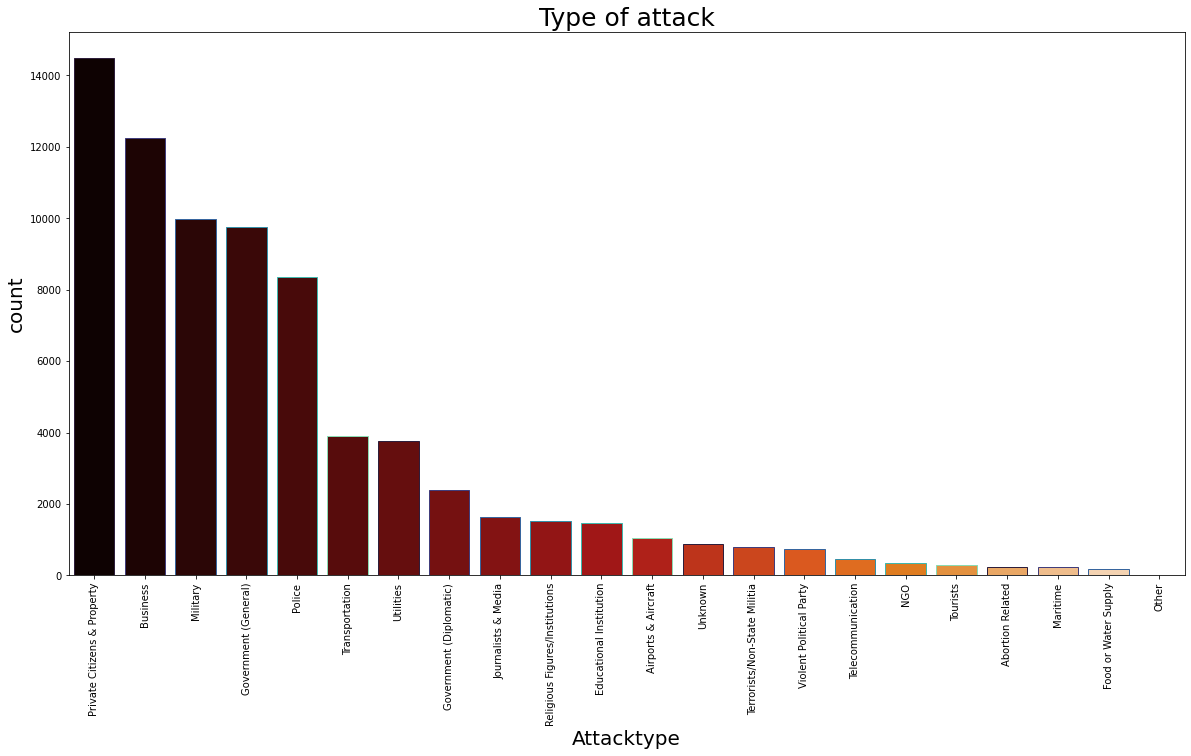

In [38]:
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("Type of attack",fontsize=25)
plt.show()

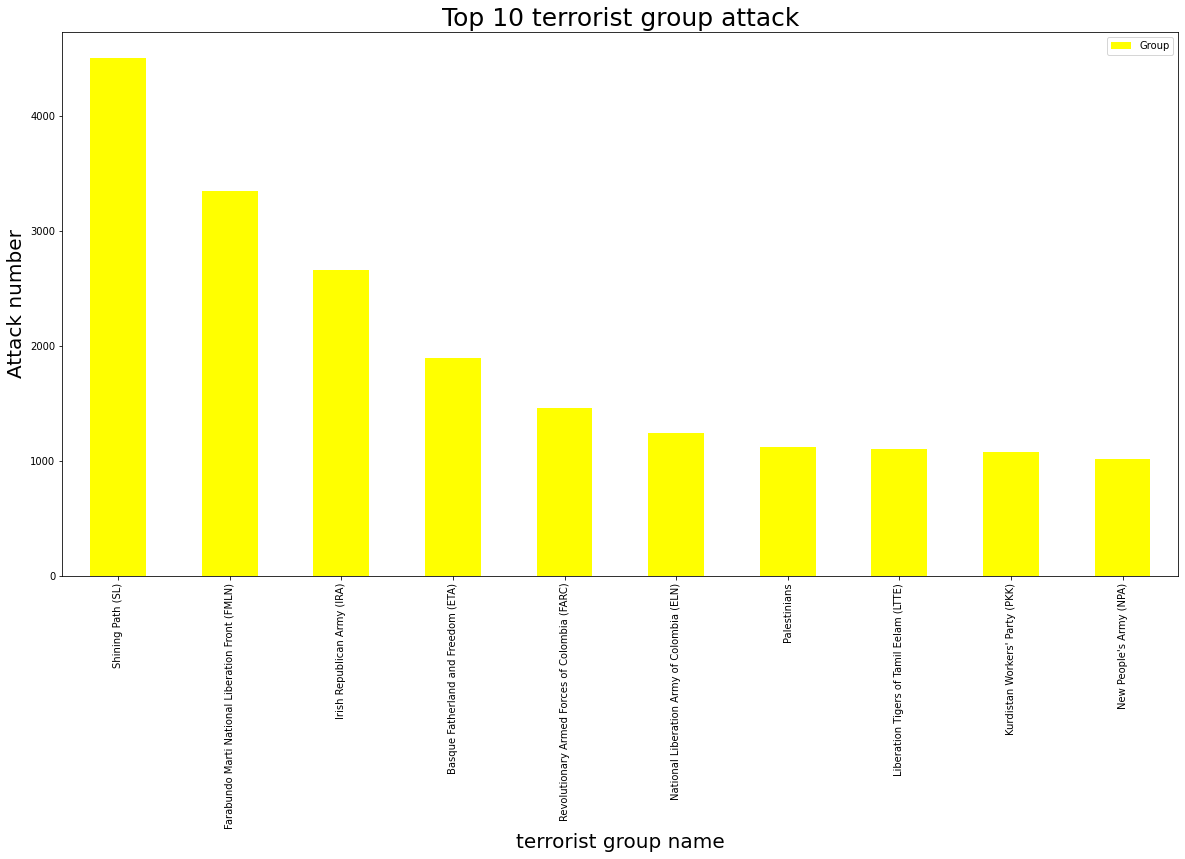

In [39]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("Attack number",fontsize=20)
plt.show()

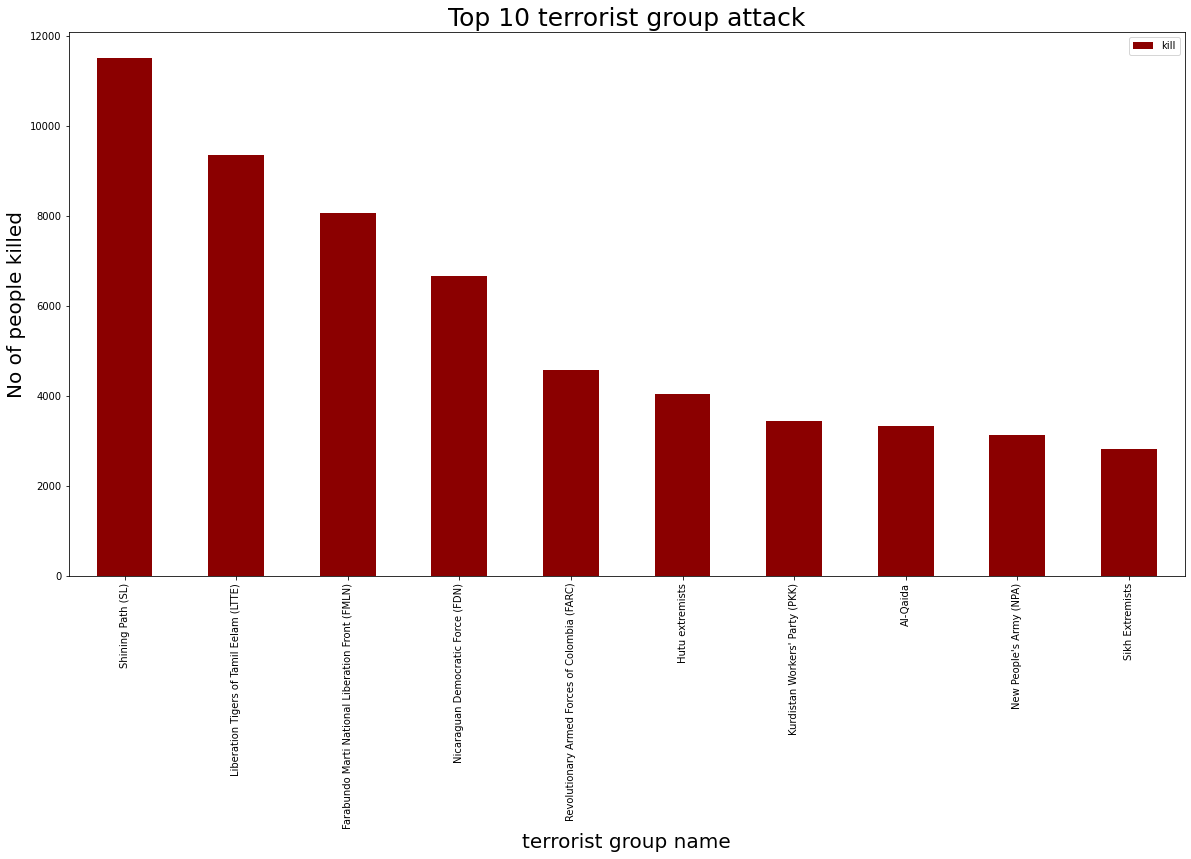

In [26]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='darkred',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("No of people killed",fontsize=20)
plt.show()

In [27]:
#Top 10 terrorist group active in countries and number of people killed by them.
data1=data[['Group','Country','kill']]
data1=data1.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
data1

,Group,Country,kill
0,Shining Path (SL),Peru,11512.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,9324.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,4554.0
5,Kurdistan Workers' Party (PKK),Turkey,3340.0
6,New People's Army (NPA),Philippines,3130.0
7,Al-Qaida,United States,3001.0
8,National Union for the Total Independence of A...,Angola,2700.0
9,Sikh Extremists,India,2476.0


Conclusion:Hence using this ,we have succesfully completed our survey on Terrorism dataset.
